# Modelo de aprendizaje automático

## Preparacion de los datos

### Caragmos dataset

In [295]:
import pandas as pd
df = pd.read_json('../ETL - EDA/EDA/EDA_Dataset.json.gz')
df

,user_id,item_id,recommend,sentiment_analysis,items_count,item_name,playtime_forever,genres,release_date,price,developer
0,76561197970982479,1250,1,2,277,Killing Floor,10006,[Action],2009,19.99,Tripwire Interactive
1,DJKamBer,1250,1,0,152,Killing Floor,2851,[Action],2009,19.99,Tripwire Interactive
2,diego9031,1250,1,1,200,Killing Floor,1204,[Action],2009,19.99,Tripwire Interactive
3,GamerFag,1250,1,2,64,Killing Floor,33723,[Action],2009,19.99,Tripwire Interactive
4,76561198092227136,1250,1,1,333,Killing Floor,8694,[Action],2009,19.99,Tripwire Interactive
...,...,...,...,...,...,...,...,...,...,...,...
38948,llDracuwulf,307130,1,1,14,Asteria,211,"[Action, Adventure, Indie]",2014,4.99,Legend Studio
38949,ChrisCoroner,209120,1,2,8,Street Fighter X Tekken,298,[Action],2012,29.99,"Capcom U.S.A., Inc."
38950,MeloncraftLP,220090,1,1,45,The Journey Down: Chapter One,403,"[Adventure, Indie]",2013,8.99,Skygoblin
38951,MeloncraftLP,262850,1,1,45,The Journey Down: Chapter Two,799,"[Adventure, Indie]",2014,19.99,Skygoblin


### Nos quedamos con las columnas necesarias

In [297]:
df = df[['user_id','recommend','sentiment_analysis','item_name','item_id']]
df

,user_id,recommend,sentiment_analysis,item_name,item_id
0,76561197970982479,1,2,Killing Floor,1250
1,DJKamBer,1,0,Killing Floor,1250
2,diego9031,1,1,Killing Floor,1250
3,GamerFag,1,2,Killing Floor,1250
4,76561198092227136,1,1,Killing Floor,1250
...,...,...,...,...,...
38948,llDracuwulf,1,1,Asteria,307130
38949,ChrisCoroner,1,2,Street Fighter X Tekken,209120
38950,MeloncraftLP,1,1,The Journey Down: Chapter One,220090
38951,MeloncraftLP,1,1,The Journey Down: Chapter Two,262850


### Generamos la clasificacion necesaria para el modelo

In [298]:
# Creamos una clasificacion para el modelo
df['Calificacion'] = df[['recommend','sentiment_analysis']].sum(axis=1)

C:\Users\Damian\AppData\Local\Temp\ipykernel_5208\267868380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calificacion'] = df[['recommend','sentiment_analysis']].sum(axis=1)


##### Dropeamos las columnas que ya estan expresadas en Clasificacion

In [299]:
df.drop(columns=['recommend', 'sentiment_analysis'], inplace=True)
df_ML = df.drop(columns='item_id')

C:\Users\Damian\AppData\Local\Temp\ipykernel_5208\276404187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['recommend', 'sentiment_analysis'], inplace=True)


##### Verificamos que el datagframe este bien para aplicarlo en el modelo

In [300]:
df_ML

,user_id,item_name,Calificacion
0,76561197970982479,Killing Floor,3
1,DJKamBer,Killing Floor,1
2,diego9031,Killing Floor,2
3,GamerFag,Killing Floor,3
4,76561198092227136,Killing Floor,2
...,...,...,...
38948,llDracuwulf,Asteria,2
38949,ChrisCoroner,Street Fighter X Tekken,3
38950,MeloncraftLP,The Journey Down: Chapter One,2
38951,MeloncraftLP,The Journey Down: Chapter Two,2


## Creacion del modelo

In [301]:
from surprise import SVD
from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

In [302]:
# Creamos la escala
Escala_Clasificacion = Reader(rating_scale=(0,3))

In [303]:
# Cargamos el dataset que vamos a usar
data = Dataset.load_from_df(df_ML, Escala_Clasificacion)

# Separamos el dataset en datos de entranamiento y datos de testeo
trainset, testset = train_test_split(data, test_size=0.3)

### Usare el modelo de Singular Value Decomposition

In [304]:
modeloML = SVD(n_factors= 4, n_epochs=20, lr_all=0.005, reg_all=0.2)

In [305]:
# Entrenamos el modelo
modeloML.fit(trainset)

#Guardamos el modelo entrenado para posteriormente guardarlo en un archivo.
ModeloEntrenado = modeloML.fit(trainset)

In [306]:
# Predecimos
predictions = modeloML.test(testset)

[Prediction(uid='SpiritOfDeath2', iid="The Beginner's Guide", r_ui=3.0, est=2.2718715189265013, details={'was_impossible': False}),
 Prediction(uid='76561198018596082', iid='Total War: ATTILA', r_ui=3.0, est=2.2013052055443385, details={'was_impossible': False}),
 Prediction(uid='76561198059743525', iid="Sid Meier's Civilization V", r_ui=3.0, est=2.4196013089103974, details={'was_impossible': False}),
 Prediction(uid='Katidis', iid='Counter-Strike: Global Offensive', r_ui=2.0, est=2.269445041216465, details={'was_impossible': False}),
 Prediction(uid='76561198048584625', iid='Counter-Strike: Global Offensive', r_ui=2.0, est=2.3210146663926823, details={'was_impossible': False}),
 Prediction(uid='76561198070629402', iid='Skullgirls', r_ui=2.0, est=2.3344016153059917, details={'was_impossible': False}),
 Prediction(uid='seederers', iid='Magicka', r_ui=2.0, est=2.369011795745916, details={'was_impossible': False}),
 Prediction(uid='X-Evolution', iid='LiEat', r_ui=2.0, est=2.39549939045459

## Evaluacion

In [314]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 0.7401


0.7401375807822166

## Optimizacion de hiperparametros

In [64]:
from surprise.model_selection import cross_validate
import numpy as np

rmse_test_means = []
factores = [1,2,4,8,16,32]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7425  0.7405  0.7479  0.7436  0.0031  
Fit time          0.16    0.15    0.18    0.16    0.01    
Test time         0.08    0.13    0.06    0.09    0.03    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7402  0.7423  0.7526  0.7451  0.0054  
Fit time          0.15    0.15    0.17    0.16    0.01    
Test time         0.06    0.14    0.06    0.09    0.04    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7473  0.7439  0.7422  0.7445  0.0021  
Fit time          0.17    0.16    0.16    0.16    0.00    
Test time         0.06    0.06    0.06    0.06    0.00    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7471  0.7

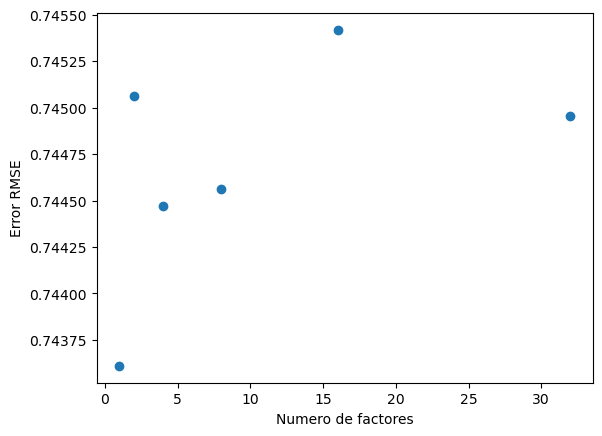

In [65]:
import matplotlib.pyplot as plt
# Ploteamos desempeño según cantidad de factores de SVD

plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [66]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [1,2,4,8,16,32],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

In [67]:
# Observamos performance del mejor modelo
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#Ya agregado en un principio

0.7439823571903766
{'n_factors': 4, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


## Guardamos el modelo para la API

In [315]:
import pickle
# Guardar el modelo en un archivo
with open('modeloDeRecomendacion.pkl', 'wb') as archivo:
    pickle.dump(ModeloEntrenado, archivo)